# Algoritmo Genético – Visualización de Cruce y Mutación: Problema de las 8 Reinas
Este notebook muestra cómo se realiza el **cruce de un punto** y una **mutación aleatoria** en una solución representada como un arreglo de 8 números.
- Cada número indica la **fila** donde se ubica una reina en cada **columna** del tablero.
- Se visualizan: **Padre 1**, **Padre 2**, **Hijo** y **Hijo mutado**.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

padre1 = [0, 4, 7, 5, 2, 6, 1, 3]
padre2 = [6, 1, 3, 0, 7, 5, 4, 2]
punto_cruce = 4

# Cruce de un punto
hijo = padre1[:punto_cruce] + padre2[punto_cruce:]

# Mutación
hijo_mutado = hijo.copy()
indice_mutacion = random.randint(0, 7)
nuevo_valor = random.randint(0, 7)
while nuevo_valor == hijo_mutado[indice_mutacion]:
    nuevo_valor = random.randint(0, 7)
hijo_mutado[indice_mutacion] = nuevo_valor

In [2]:
def dibujar_tableros(titulos, individuos, resaltar=None):
    fig, axs = plt.subplots(1, len(individuos), figsize=(3 * len(individuos), 3))

    if len(individuos) == 1:
        axs = [axs]

    for ax, individuo, titulo in zip(axs, individuos, titulos):
        ax.set_xlim(0, 8)
        ax.set_ylim(0, 8)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titulo)

        for i in range(8):
            for j in range(8):
                color = 'lightgray' if (i + j) % 2 == 0 else 'white'
                ax.add_patch(plt.Rectangle((j, 7 - i), 1, 1, facecolor=color))

        for col, row in enumerate(individuo):
            color = 'red' if resaltar and resaltar == (col, row) else 'black'
            ax.text(col + 0.5, 7.5 - row, '♛', ha='center', va='center', fontsize=24, color=color)

    plt.tight_layout()
    plt.show()

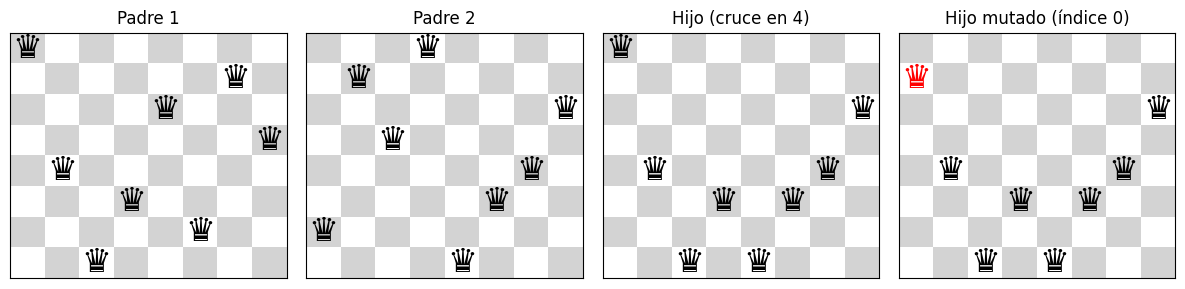

In [3]:
# Mostrar visualización
dibujar_tableros(
    ["Padre 1", "Padre 2", f"Hijo (cruce en {punto_cruce})", f"Hijo mutado (índice {indice_mutacion})"],
    [padre1, padre2, hijo, hijo_mutado],
    resaltar=(indice_mutacion, hijo_mutado[indice_mutacion])
)